## Aligning legend labels with lines

Randal Olson did a nice example of how to instead of a classic legend [put every label by their corresponding line](www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/). This is a nice technique when there are many labels. Having to always look at the legend then interpretation hard.

<img src="hardlabels.png" width="50%">

#### Here's what we call a 'really crappy viz' in the biz

Decided to extend upon his work making the alignment of the labels automatic, and by leveraging seaborn. Putting it here for future use and for others to use.

In [56]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd  
  
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})
sns.set_style("whitegrid")
custom_style = {
            'grid.color': '0.8',
            'grid.linestyle': '--',
            'grid.linewidth': 0.5,
}
sns.set_style(custom_style)    

In [57]:
df = pd.read_csv("t")      

In [68]:
def legend_positions(df, y):
    """ Calculate position of labels to the right in plot... """
    positions = {}
    for column in y:    
        positions[column] = df[column].values[-1] - 0.5    

    def push():
        """ 
        ...by puting them to the last y value and 
        pushing until no overlap 
        """
        collisions = 0
        for column1, value1 in positions.iteritems():
            for column2, value2 in positions.iteritems():
                if column1 != column2:
                    dist = abs(value1-value2)
                    if dist < 2.5:
                        collisions += 1
                        if value1 < value2:
                            positions[column1] -= .1
                            positions[column2] += .1
                        else:
                            positions[column1] += .1
                            positions[column2] -= .1
                        return True
    while True:
        pushed = push()
        if not pushed:
            break
            
    return positions

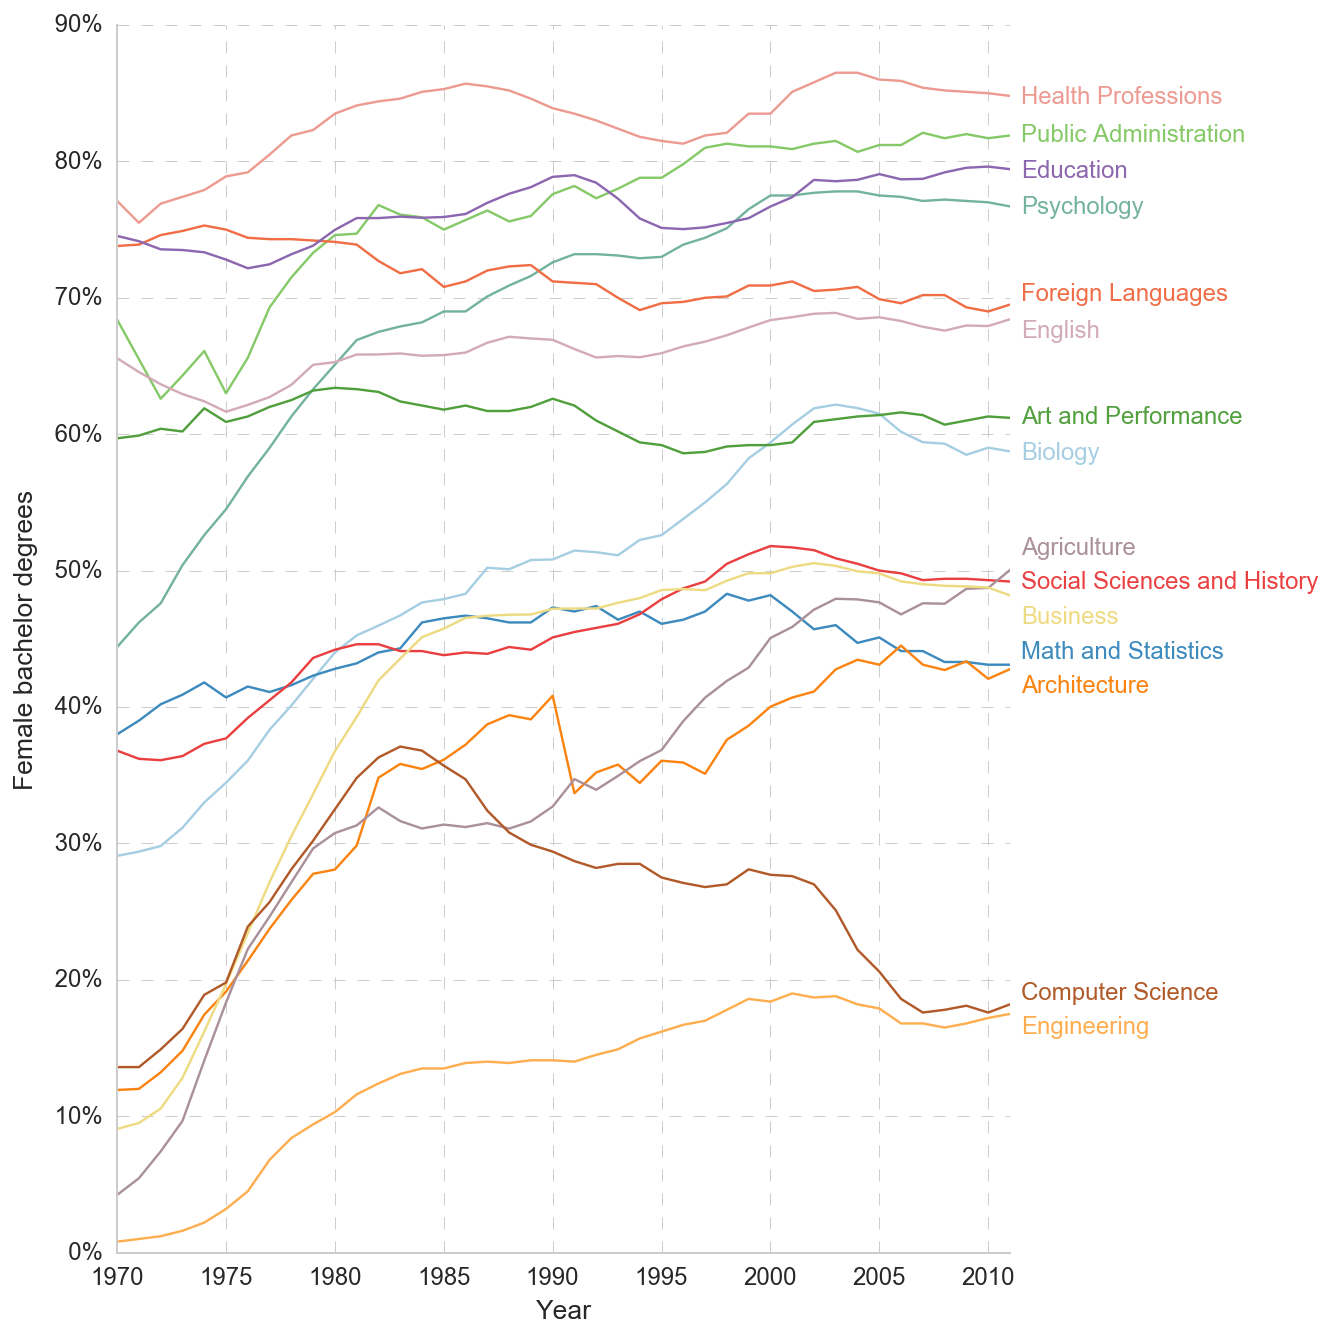

In [69]:
x = 'Year'
y = ['Health Professions', 'Public Administration', 'Education', 
     'Psychology', 'Foreign Languages', 'English',    
     'Art and Performance', 'Biology', 'Agriculture',    
     'Social Sciences and History', 'Business', 'Math and Statistics',    
     'Architecture', 'Computer Science', 'Engineering']  
positions = legend_positions(df, y)

f, ax = plt.subplots(figsize=(8,11))        
cmap = plt.cm.get_cmap('Paired', len(y))

for i, (column, position) in enumerate(positions.iteritems()):
    
    # Get a color
    color = cmap(float(i)/len(positions))
    # Plot each line separatly so we can be explicit about color
    ax = df.plot(x=x, y=column, legend=False, ax=ax, color=color)
    
    # Add the text to the right
    plt.text(
        df[x].max() + 0.5, 
        position, column, fontsize=12, 
        color=color # Same color as line
    ) 
ax.set_ylabel('Female bachelor degrees')
# Add percent signs
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in ax.get_yticks()]) 
sns.despine()